In [2]:
import pandas as pd
df = pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(df.info())
print("****************************************************")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None
****************************************************
         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.

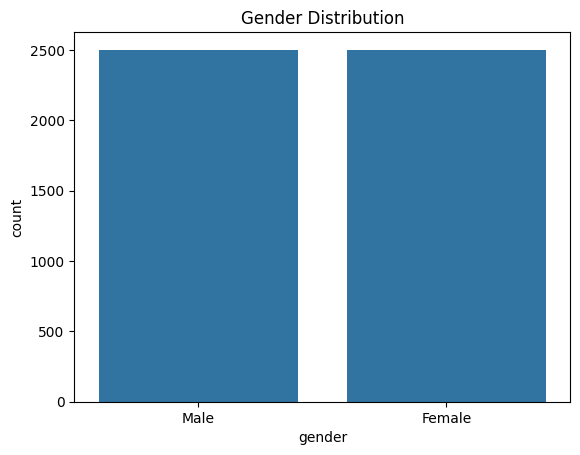

In [4]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


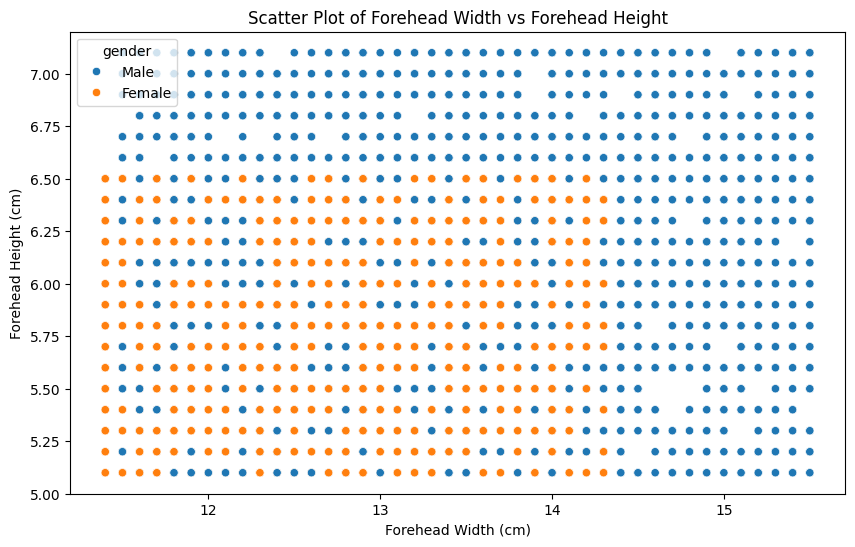

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='forehead_width_cm', y='forehead_height_cm', hue='gender', data=df)
plt.title('Scatter Plot of Forehead Width vs Forehead Height')
plt.xlabel('Forehead Width (cm)')
plt.ylabel('Forehead Height (cm)')
plt.show()


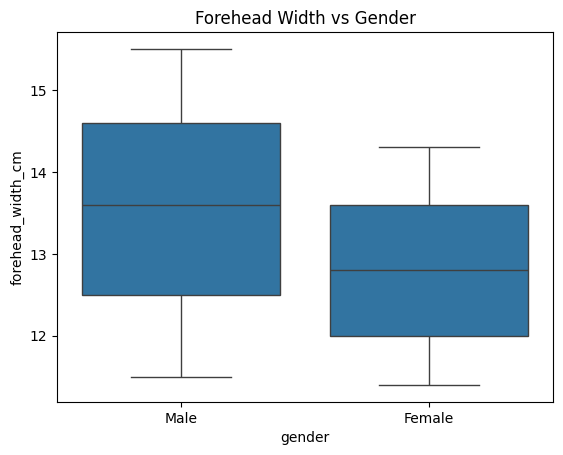

In [6]:
sns.boxplot(x='gender', y='forehead_width_cm', data=df)
plt.title('Forehead Width vs Gender')
plt.show()


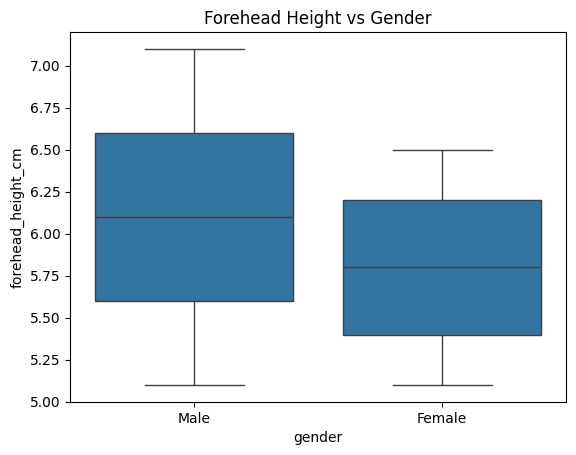

In [7]:
sns.boxplot(x='gender', y='forehead_height_cm', data=df)
plt.title('Forehead Height vs Gender')
plt.show()


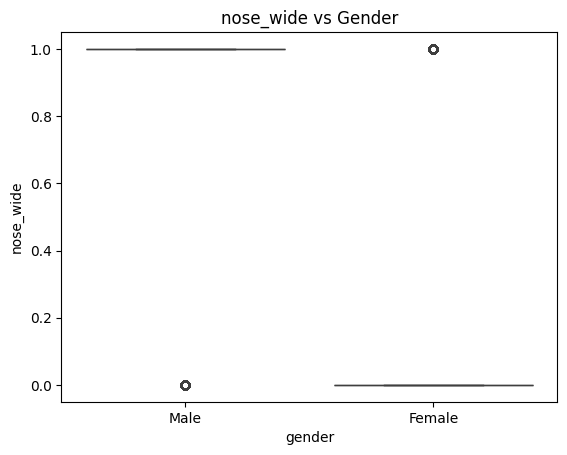

In [8]:
sns.boxplot(x='gender', y='nose_wide', data=df)
plt.title('nose_wide vs Gender')
plt.show()


In [9]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


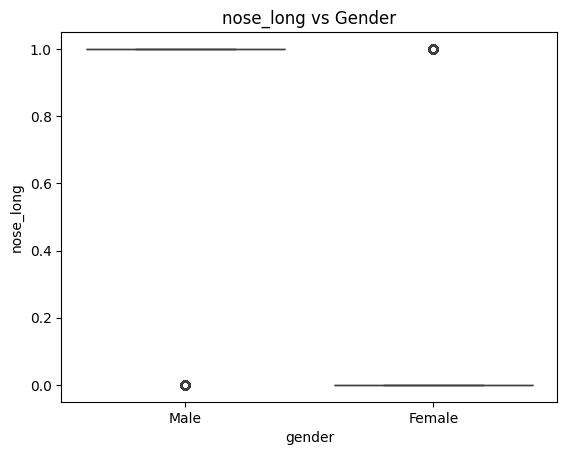

In [10]:
sns.boxplot(x='gender', y='nose_long', data=df)
plt.title('nose_long vs Gender')
plt.show()

In [11]:
missing_values = df.isnull().sum()

print(missing_values)


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB


# Separate features and target
X = df.drop('gender', axis=1)
y = df['gender']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model

model = MultinomialNB()
model.fit(X_train, y_train)

# model = GaussianNB()
# model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Female', 'Male'])

print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(report)


Accuracy: 95.70%

Classification Report:
              precision    recall  f1-score   support

      Female       1.00      0.92      0.96       502
        Male       0.92      1.00      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [13]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

importance = log_reg.coef_[0]

features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                     Feature  Importance
3                  nose_wide    3.749824
6  distance_nose_to_lip_long    3.744441
4                  nose_long    3.512475
5                  lips_thin    3.302252
2         forehead_height_cm    0.977954
1          forehead_width_cm    0.707398
0                  long_hair   -0.347955


In [14]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [15]:
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object